In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import mixture
sns.set(style='whitegrid')
sns.set_palette('bright')
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('ndvi2010.csv')
df.columns = ['date','value']
df.date = pd.to_datetime(df.date,format = '%d-%b-%y')

In [4]:
dff = pd.read_csv('ndvi2020.csv')
dff.columns = ['date','value']
dff.date = pd.to_datetime(dff.date,format = '%d-%b-%y')

In [5]:
data = pd.concat([df,dff])

In [6]:
df10 = data[(data.date.dt.year >= 2000) & (data.date.dt.year < 2010)]
df20 = data[(data.date.dt.year >= 2010) & (data.date.dt.year < 2019)]

In [7]:
df10 = np.asarray(df10.value)
df20 = np.asarray(df20.value)
df10 = df10.reshape(-1,1)
df20 = df20.reshape(-1,1)

In [8]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(df10)
        bic.append(gmm.bic(df10))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm10 = gmm

In [9]:
best_gmm10.get_params

<bound method BaseEstimator.get_params of GaussianMixture(covariance_type='tied', n_components=2)>

<AxesSubplot:ylabel='Density'>

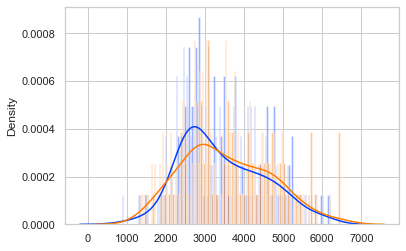

In [10]:
sns.distplot(df10,bins=150)
x,_=best_gmm10.sample(227)
sns.distplot(x,bins=150)

In [12]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(df20)
        bic.append(gmm.bic(df20))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm20 = gmm

In [13]:
best_gmm20.n_components

4

<AxesSubplot:ylabel='Density'>

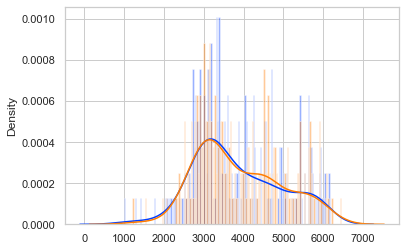

In [67]:
sns.distplot(df20,bins=150)
x,_=best_gmm20.sample(227)
sns.distplot(x,bins=150)

In [68]:
best_gmm10.means_

array([[4638.2538466 ],
       [2833.82217836]])

In [71]:
t=best_gmm20.means_.T

In [72]:
np.dot(best_gmm10.means_,t)

array([[14616703.93886293, 25925782.83136919,  8045829.22637472,
        20395594.34066155],
       [ 8930330.50074742, 15839809.72339111,  4915739.85794836,
        12461044.49971164]])